<b> Principal Component Analysis </b>
<table style="width:50%">
<tr>
    <th>mouse</th>    
    <th>gene1</th>
    <th>gene2</th>
</tr>
<tr>
    <th>1</th>
    <th>10</th>
    <th>6</th>
</tr>
<tr>
    <th>2</th>
    <th>11</th>
    <th>4</th>
</tr>
<tr>
    <th>3</th>
    <th>8</th>
    <th>5</th>
</tr>
<tr>
    <th>4</th>
    <th>3</th>
    <th>3</th>
</tr>
<tr>
    <th>5</th>
    <th>1</th>
    <th>2.8</th>
</tr>
<tr>
    <th>6</th>
    <th>2</th>
    <th>1</th>
</tr>
</table>

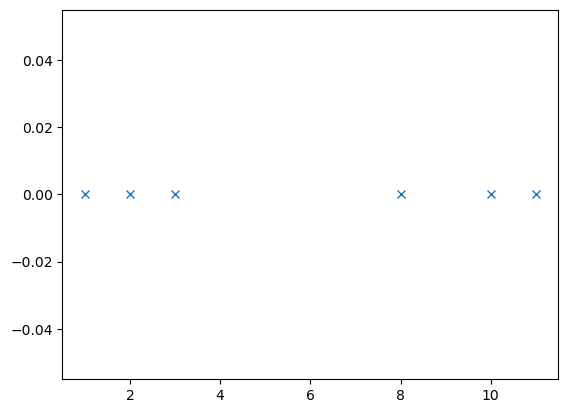

In [3]:
from matplotlib import pyplot as plt
import numpy as np
gene1 = [10, 11, 8, 3, 1, 2]
val = 0
plt.plot(gene1, np.zeros_like(gene1) + val, 'x')

Mice 1, 2 and 3 are more similar to each other than they are to mice 4, 5 and 6. If we measure 2 genes we can do a 2D plot of this.

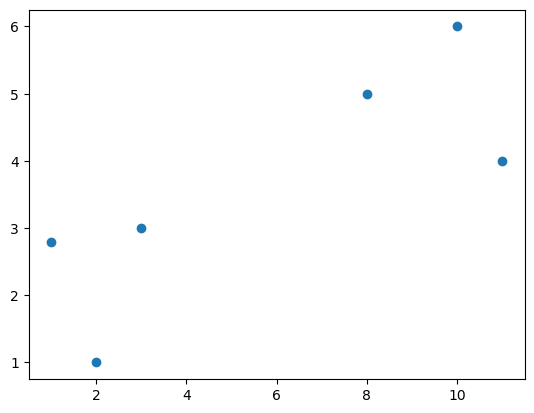

In [4]:
gene1 = [10, 11, 8, 3, 1 ,2]
gene2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(gene1, gene2)

<ul>
    <li> PCA can tell us which gene or variable is the most valuable for clustering data</li>
    <li> For example, PCA could tell is that Gene3 is responsible for separating samples along the x-axis</li>
    </ul>

To understand PCA we will consider the dataset with two genes.

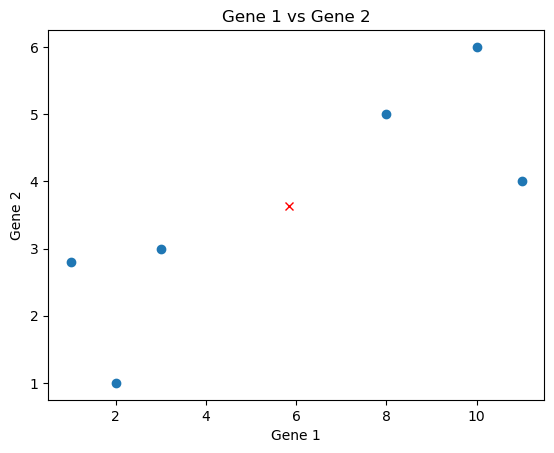

In [5]:
gene1 = [10, 11, 8, 3, 1 ,2]
gene2 = [6, 4, 5, 3, 2.8, 1]
plt.scatter(gene1, gene2)
plt.title("Gene 1 vs Gene 2")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")
gene1average = np.average(gene1)
gene2average = np.average(gene2)
plt.plot(gene1average, gene2average, 'rx')

<ul>
    <li> Next calculate the average measurement for Gene 1 and the average measurement for Gene 2.</li>
    <li> With the average values we can calculate the centre of the data </li>
    <li> From this point, we will focus on what happens in the graph, we no longer need the original data </li>
    <li> We will shift the data so that the centre is at the origin</li>
    </ul>

In [6]:
gene1 = gene1 - gene1average
gene2 = gene2 - gene2average
print(gene1)
print(gene2)

[ 4.16666667  5.16666667  2.16666667 -2.83333333 -4.83333333 -3.83333333]
[ 2.36666667  0.36666667  1.36666667 -0.63333333 -0.83333333 -2.63333333]


Text(0, 0.5, 'Gene 2')

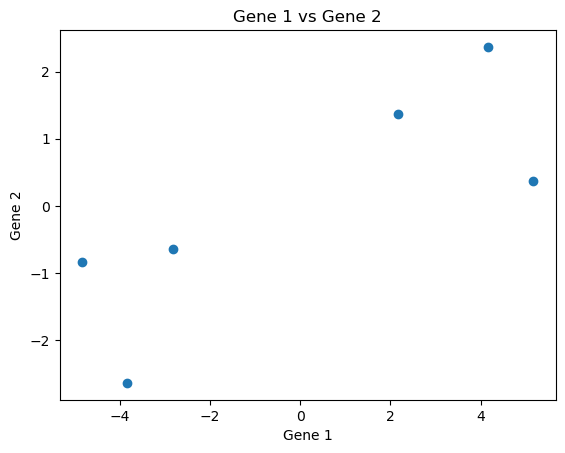

In [7]:
plt.scatter(gene1, gene2)
plt.title("Gene 1 vs Gene 2")
plt.xlabel("Gene 1")
plt.ylabel("Gene 2")

<ul>
    <li> Shifting the data did not change how the data points are positioned relative to each other</li>
    <li> Now that the data is centred at the origin we can try to fit a line to it</li>
    <li> Start with a random line through the origin and rotate until it fits as good as possible </li>
    <li> We need to talk about how PCA decides if a fit is good or not</li>
    <li> Consider the starting random line through the original </li>
    <li> To quantify how good this line fits the data, PCA project the data onto it and then it can either measure the distances from the data to the line and try to find the line that minimises distances or </li>
    <li> It can try to find the line that maximises the distances from the projected points to the origin</li>
    <li> $a^2 = b^2 + c^2$ since $a$ is fixed as $b$ gets bigger $c$ must get smaller and vice versa</li>
    <li> PCA can either minimise $b$ or maximise $c$ </li>
    <li> Intuitively it is more obvious to minimise $b$... but it is actually easier to calculate c, the distance from the projected point to the origin, so PCA finds the best line by maximising the sum of the squared distances from the projected points to the origin </li>
    <li> Rotate the line to find largest SS(distances) </li>
    <li> This line is called Principal Component 1 or PC1 for short </li>
<ul>

In [8]:
from scipy import stats
slope, intercept, _, _, _=stats.linregress(gene1, gene2)
print(slope)
print(intercept)

0.32302284710017576
-1.6964884226316686e-16


<ul>
    <li>PC1 has a slope of $\frac{1}{3}$. In other words for every 3 units that we go along the gene1 axis we go up 1 unit in the gene2 axis</li>
    <li>This means that the data is mostly sprwad out along the gene1 axis.. and only a little bit spread out along the gene2 axis</li>
    <li>To make PC1 mix 3 parts gene1 and 1 part gene2</li>
    <li>The ratio of gene1 to gene2 tells you that gene1 is much more important when it comes to describing how the data is spread out</li>
    <li>PC1 is a linear combination of gene1 and gene2</li>
    <li> When you do PCA with Singular Value Decomposition (SVD) the recipe for PC1 is scaled so that its length is 1 </li>
    <li>$PC1 = \frac{3}{\sqrt(10)}gene1 + \frac{1}{\sqrt(10)}gene2$</li>

<ul>
    <li> The unit vector is called the Singular vector or the eigenvector for PC1</li>
    <li> The proportions of each gene are called "Loading Scores"</li>
    <li> PCA calls the average of the SS(distances) for the best fit line the eigenvalue for PC1</li>
    <li>$\frac{SS(distances for PC1)}{n-1} = Eigenvalue for PC1$</li>
    <li>$\sqrt(SS(distances for PC1)) = Singular value for PC1$</li>

<ul>
    <li> Because this is only 2D, PC2 is just the line through the origin that is perpendicular to PC1</li>
    <li> $PC2 = -1gene1 + 3gene2$</li>
    <li> Scaling to unit vector would give $PC2 = \frac{-1}{\sqrt(10)}gene1 + \frac{3}{\sqrt(10)}gene2$</li>
    <li> For PC2 gene2 is 3 times as important as gene1</li>
    <li> To draw the final PCA plot rotate everything so that PC1 is horizontal. Then see where sample points end up</li>
    <li> Eigenvalues are measures of variation </li>
    <li> Suppose the variation for PC1 was 15 and PC2 was 3. Total variation is 18</li>
    <li> This means PC1 explains 15/18 or 83% of the variance </li>
    <li> A scree plot is a graphical representation of the percentages of variation that each PC accounts for</li>
    <ul>
        

<b> PCA with 3 variables </b>
<ul>
    <li> Centre the data </li>
    <li> Find the line of best fit that goes through the origin - PC1</li>
    <li> $PC1 = 0.62gene1 + 0.15gene2 + 0.77gene2$ </li>
    <li> PC2 is the next best fitting line that goes through and it at right angles to PC1 </li>
    <li> $PC2 = 0.77gene1+0.62gene2 + 0.15gene3$</li>
    <li> PC3 is the best fitting line through the origin that is at right angles to both PC1 and PC2</li>
</ul>

<ul>
    <li> In there there is one PC per gene or (variable) but it practice, the number of principal components is either the number of variables or the number of samples, whichever is smaller</li>
    <li> Once we have all the PCs, you can use the eigenvalues to determine the proportion of variation that PC accounts for</li>
    <li> Suppose that PC1 accounts for 79%, PC2 15%, PC3 6%.</li>
    <li>PC1 and PC2 account for most of the variation. A 2D graph using just PC1 and PC2 would be a good approximation </li>
    </ul>

In [10]:
import pandas as pd
import numpy as np
import random as rnd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [15]:
genes=['gene'+str(i) for i in range(1, 101)]
wt = ['wt' + str(i) for i in range(1, 6)]
ko = ['ko' + str(i) for i in range(1, 6)]


In [22]:
data = pd.DataFrame(columns=[*wt, *ko], index=genes)
for gene in data.index:
    data.loc[gene, 'wt1':'wt5'] = np.random.poisson(lam=rnd.randrange(10, 1000), size=5)
    data.loc[gene, 'ko1':'ko5'] = np.random.poisson(lam=rnd.randrange(10, 1000), size=5)

In [23]:
print(data.head())

       wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
gene1  542  492  541  503  520    7    4   17   16    7
gene2  505  499  521  540  547  573  558  541  557  558
gene3  678  730  693  717  745  595  518  502  516  536
gene4  540  512  560  516  514   40   59   49   53   45
gene5  244  201  242  228  227  167  188  184  188  184


In [24]:
print(data.shape)

(100, 10)


In [27]:
print(data.describe())

        wt1  wt2  wt3  wt4  wt5  ko1  ko2  ko3  ko4  ko5
count   100  100  100  100  100  100  100  100  100  100
unique   95   97   94   97   96   98   96   95   97   95
top     542  892  541  736   84  607  693  427  534  622
freq      2    2    2    2    2    2    2    2    3    2


In [28]:
scaled_data = preprocessing.scale(data.T)

In [30]:
print(scaled_data)

[[ 1.08615991 -1.50986078  0.58443872  1.04661434  1.48167149  0.64046808
   1.0281603   1.05786335  0.94298958  1.18530759 -1.04855358 -1.05647167
   0.39856734 -0.8070645  -1.1640637   0.88492845  0.90032375  0.64740892
  -0.84875272 -0.96945883  1.11404147  0.86838628 -1.13532788 -1.16595131
  -0.24608648 -0.93094485  0.61877448 -1.0463015   0.88727241  0.8751545
   0.92865863  0.0578013  -0.4843793  -1.32835625 -0.40110176 -0.99991439
  -0.9863563  -1.07170937 -1.00971595 -1.32188065  1.0641712   1.01839213
   0.86550787  1.10743931  1.02319399  1.03949043 -1.05224046 -1.26941044
   0.12771518  0.8743212  -0.97985398  1.56657781 -0.97247901 -0.77018971
   0.91591418 -0.91399122  0.92684963 -0.97184724 -0.75851887 -0.95754741
   1.07744877 -0.99257184  1.06580838  0.87389586  1.31456542 -1.02198985
  -0.99462277  1.12330181  0.9437935   1.50657371 -1.01141063  1.07684913
   0.93665598 -1.05360771 -0.99364453 -0.95975621  1.0442154   0.84385679
  -1.04398111 -0.5931013  -1.04729764  

In [31]:
pca = PCA()

In [32]:
pca.fit(scaled_data)

PCA()

In [33]:
pca_data = pca.transform(scaled_data)

In [34]:
per_var = np.round(pca.explained_variance_ratio_ *100, decimals=1)
per_var

array([89.7,  2.5,  1.8,  1.5,  1.3,  1.2,  0.9,  0.6,  0.5,  0. ])

Text(0.5, 1.0, 'Scree plot')

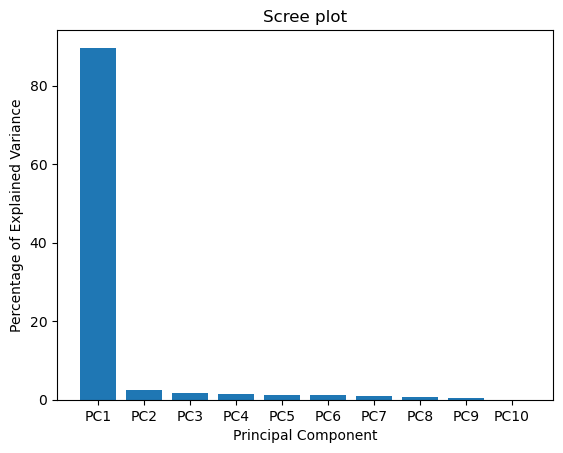

In [35]:
labels=["PC"+str(i) for i in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.title("Scree plot")

In [37]:
pca_df = pd.DataFrame(pca_data, index=[*wt, *ko], columns=labels)
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
wt1,9.453442,0.821789,-0.844033,-0.346611,-0.392669,-1.429857,-0.587578,1.751854,0.179236,4.996004e-16
wt2,9.376462,-0.963697,-0.173408,-0.659777,1.997382,1.793176,-1.110183,0.020886,0.271557,2.803313e-15
wt3,9.696306,2.559847,0.909271,1.658760,-0.005112,-0.527717,-0.699891,-1.068081,-0.462200,1.665335e-15
wt4,9.503725,-1.076350,2.317940,-0.538612,0.368761,-0.446392,1.883055,0.021642,0.177432,1.110223e-15
wt5,9.312704,-1.405434,-2.266053,-0.110606,-1.950707,0.622895,0.529246,-0.712726,-0.178346,1.831868e-15
ko1,-9.641329,-1.547294,-1.562944,1.228735,1.692781,-1.538403,0.332924,-0.402084,0.144492,-1.026956e-15
ko2,-9.550664,1.872333,-0.631772,-0.899283,0.548710,0.805467,0.884797,0.397256,-1.458599,-1.998401e-15
ko3,-9.357137,-1.272825,1.290036,-1.866631,-0.853325,-0.923388,-1.335109,-0.572882,-0.357431,-3.219647e-15
ko4,-9.303036,2.234998,-0.262786,-0.649610,-0.375360,0.461681,0.364353,-0.309039,1.676363,6.938894e-16
ko5,-9.490473,-1.223366,1.223748,2.183635,-1.030461,1.182538,-0.261615,0.873174,0.007496,9.992007e-16


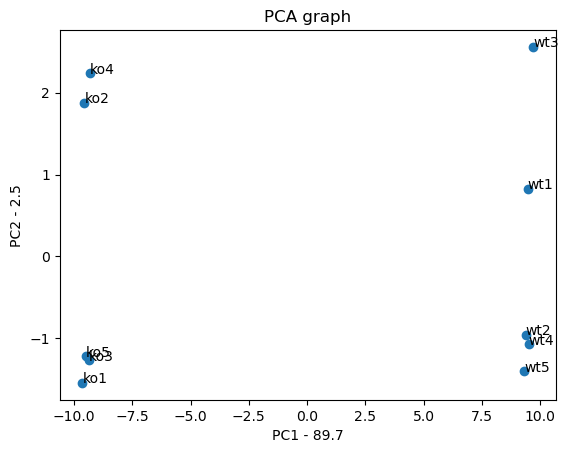

In [39]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA graph")
plt.xlabel(f'PC1 - {per_var[0]}')
plt.ylabel(f'PC2 - {per_var[1]}')
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))

In [49]:
loading_scores = pd.Series(pca.components_[0], index=genes)

In [50]:
import sys
np.set_printoptions(threshold=False)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(loading_scores)

gene1      0.105461
gene2     -0.080223
gene3      0.100225
gene4      0.105468
gene5      0.093766
gene6      0.102801
gene7      0.105560
gene8      0.105542
gene9      0.105027
gene10     0.100275
gene11    -0.104530
gene12    -0.105461
gene13     0.101589
gene14    -0.104698
gene15    -0.096541
gene16     0.103845
gene17     0.105115
gene18     0.103485
gene19    -0.086899
gene20    -0.105490
gene21     0.105173
gene22     0.102351
gene23    -0.103377
gene24    -0.095456
gene25     0.073344
gene26    -0.105300
gene27     0.078903
gene28    -0.103940
gene29     0.104966
gene30     0.105199
gene31     0.105290
gene32     0.085735
gene33    -0.103306
gene34    -0.103379
gene35    -0.033461
gene36    -0.104963
gene37    -0.105560
gene38    -0.101779
gene39    -0.105419
gene40    -0.099629
gene41     0.105310
gene42     0.105271
gene43     0.105272
gene44     0.105439
gene45     0.105534
gene46     0.105502
gene47    -0.098521
gene48    -0.103305
gene49     0.051423
gene50     0.104760


In [52]:
sorted_loading_scores = loading_scores.abs().sort_values(ascending=False)
top_10_genes = sorted_loading_scores[0:10].index.values
print(loading_scores[top_10_genes])

gene7     0.105560
gene37   -0.105560
gene8     0.105542
gene45    0.105534
gene61    0.105531
gene55    0.105529
gene46    0.105502
gene20   -0.105490
gene4     0.105468
gene1     0.105461
dtype: float64
